In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Global Vectors for Word Representation, or GloVe

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

GloVe derives semantical meaning by training on a co-occurrence matrix. It’s built on the idea that word-word co-occurrences are a vital piece of information and using them is an efficient use of statistics for generating word embeddings.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
from scipy import spatial 

emmbed_dict = {} 
with open('/content/drive/MyDrive/Datasets/glove.6B.100d.txt','r', encoding="utf8") as f: 
  for line in f: 
    values = line.split() 
    word = values[0] 
    vector = np.asarray(values[1:],'float32') 
    emmbed_dict[word]=vector

In [ ]:
emmbed_dict['india']

array([-0.95967  ,  0.30795  ,  0.90052  ,  1.0364   ,  0.0034906,
       -0.80758  , -1.139    ,  0.81109  , -0.67857  ,  0.52609  ,
       -0.072252 , -0.75613  ,  0.52847  ,  1.0927   , -0.51895  ,
       -0.21335  ,  0.18184  ,  0.40038  , -0.6547   ,  0.34626  ,
        0.92248  , -0.25001  ,  1.1779   ,  0.61006  ,  0.029763 ,
        0.4378   ,  0.53647  ,  0.68827  ,  0.14582  , -0.27446  ,
       -0.50289  ,  1.0366   , -0.29851  , -0.32927  ,  0.24944  ,
       -0.33779  ,  0.0083236, -0.21373  , -0.45898  , -0.23441  ,
       -1.2958   ,  0.74799  ,  0.78192  , -0.75644  ,  0.84375  ,
       -0.51725  ,  1.0952   ,  0.51768  ,  0.27906  , -0.033519 ,
       -0.1573   ,  0.7396   ,  0.39775  ,  1.132    , -0.69279  ,
       -2.0093   , -1.1731   , -0.14204  ,  1.5658   , -0.097956 ,
       -0.071165 , -0.18906  ,  0.037441 ,  0.48037  ,  0.29248  ,
        0.9216   ,  0.33285  ,  0.30963  ,  1.1272   ,  0.19965  ,
        0.47058  ,  0.019022 , -0.27432  , -0.49782  , -0.2944

Task 2: Define a function similar_word(vector), that finds 10 nearest words with an Euclidian metrics. Output 10 nearest words to word ‘holiday’. 

Task 3: pass to the defined function a result of vector sum: (emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])

The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words. Sometimes, the nearest neighbors according to this metric reveal rare but relevant words that lie outside an average human's vocabulary.

In [ ]:
def similar_word(vector):
  return sorted(emmbed_dict.keys(), key = lambda token: spatial.distance.euclidean(emmbed_dict[token], vector))[1:11]

In [ ]:
similar_word(emmbed_dict['holiday'])

['christmas',
 'holidays',
 'thanksgiving',
 'easter',
 'vacation',
 'festive',
 'weekend',
 'day',
 'eve',
 'celebration']

In [ ]:
vector_sum = emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince']
similar_word(vector_sum)

['queen',
 'prince',
 'princess',
 'throne',
 'royal',
 'son',
 'crown',
 'emperor',
 'father',
 'brother']

To visualize the vectors, we are using a method called distributed stochastic gradient neighbor embeddings in short known as TSNE, which is used to reduce data dimensions. Here we are dealing with 100-dimensional data TSNE will break it down into components as we want here; we will break it into two dimensions.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


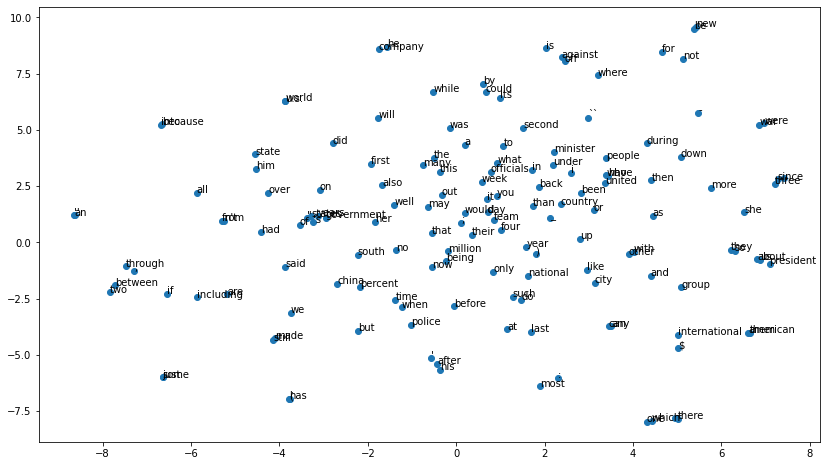

In [ ]:
# import modules
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 

# n_components - Dimension of the embedded space
distri = TSNE(n_components=2) 
# save the keywords of our dictionary to list
words = list(emmbed_dict.keys()) 
# call and save vector for each keyword
vectors = [emmbed_dict[word] for word in words] 
# fit vectors for elements from 700 to 850 to new dementions
y = distri.fit_transform(vectors[700:850]) 

# create plot
plt.figure(figsize=(14,8)) 
plt.scatter(y[:, 0],y[:,1]) 

for label,x,y in zip(words,y[:, 0],y[:,1]): 
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points') 

# print plot  
plt.show()

Convert GloVe Embedding to word2Vec

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec 
glove_input_file = '/content/drive/MyDrive/Datasets/glove.6B.100d.txt' 
word2vec_output_file = '/content/drive/MyDrive/Datasets/glove.6B.100d.txt.word2vec' 
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_output_file)
result = model.most_similar(positive=['holiday'], topn=10)
print(result)

[('christmas', 0.8736868500709534), ('holidays', 0.8367420434951782), ('thanksgiving', 0.8074916005134583), ('easter', 0.7501793503761292), ('vacation', 0.7091560959815979), ('day', 0.691911518573761), ('festive', 0.6855349540710449), ('weekend', 0.679313600063324), ('celebration', 0.6679718494415283), ('halloween', 0.6651991009712219)]


In [ ]:
result = model.most_similar(positive=['king', 'queen', 'prince'], topn=10)
print(result)

[('princess', 0.7648884057998657), ('throne', 0.7252353429794312), ('crown', 0.7219024896621704), ('son', 0.7164897322654724), ('monarch', 0.7104225754737854), ('royal', 0.7101736068725586), ('brother', 0.7099979519844055), ('cousin', 0.6880110502243042), ('father', 0.6844609975814819), ('elizabeth', 0.6827999949455261)]


# Practice 6 
# FastText

fastText is a popular open source text classification library that was published in 2015 by the Facebook AI Research Lab.

The main principle of FastText is that the lexical structure of a word will carry important information about the word's meaning, while traditional word embedding does not take this information into account. Traditional word embedding will learn a unique word embedding for each word. This is especially important for morphological languages ​​(German, Turkish). In this language, a single word can have a large number of morphological forms, and each morphological form is rare, so it is difficult to train well-trained word embeddings.

FastText tries to solve this problem by treating each word as a set of its subwords. For simplicity and language independence, a subword is treated as a symbolic n-gram (n-gram) of a word. The word vector is simply considered as the sum of all the vectors that make up the feature map.

In [ ]:
import gensim

In [ ]:
from gensim.models.fasttext import FastText
# some example sentences
from gensim.test.utils import common_texts

print(common_texts[8]) # output the example of text
print(len(common_texts)) # output the number of texts

tokenised_sentences = common_texts[:]
tokenised_sentences

['graph', 'minors', 'survey']
9


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
model = FastText(window=3, min_count=1) # instantiate

In [ ]:
model.build_vocab(tokenised_sentences) 
model.train(sentences = tokenised_sentences, total_examples=len(tokenised_sentences), epochs=10) # train

In [ ]:
print(model.wv[' you ']) #get a word vector

In [ ]:
model.most_similar("happy") #Output similar words vectors

In [ ]:
print('night' in model.wv.vocab)

False


In [ ]:
print("nights" in model.wv.vocab) 
print("night" in model.wv.vocab) 


False
False


In [ ]:
print(model.similarity("night", "nights"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [ ]:
# Model saving and loading 
fname = 'fasttext.model.txt'
model.save(fname) 
model = FastText.load(fname)

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Datasets/Fake.csv', delimiter = ',') 
true = pd.read_csv('/content/drive/MyDrive/Datasets/True.csv', delimiter = ',')

In [ ]:
fake['target'] = 0 
true['target'] = 1 

df = pd.DataFrame() 
df = true.append(fake)
df = shuffle(df).reset_index(drop=True) 

In [ ]:
df['text']=df['text']+" "+df['title']

In [ ]:
import string 
import re

def clean_text(text): 
  lemmatizer = WordNetLemmatizer() 
  stopwords_english = stopwords.words('english') 
  text= re.sub('\[[^]]*\]', '', text) 
  # remove stock market tickers like $GE
  text = re.sub(r'\$\w*', '', text) 
  #removal of html tags 
  review =re.sub(r'<.*?>',' ',text) 
  # remove old style retweet text "RT" 
  text = re.sub(r'^RT[\s]+', '', text) 
  # remove hyperlinks 
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) 
  # remove hashtags 
  # only removing the hash # sign from the word 
  text = re.sub(r'#', '', text) 
  text = re.sub("["
                 u"\U0001F600-\U0001F64F" # removal of emoticons 
                 u"\U0001F300-\U0001F5FF" # symbols & pictographs 
                 u"\U0001F680-\U0001F6FF" # transport & map symbols 
                 u"\U0001F1E0-\U0001F1FF" # flags (iOS) 
                 u"\U00002702-\U000027B0" 
                 u"\U000024C2-\U0001F251" 
                 "]+",' ',text) 
  text = re.sub('[^a-zA-Z]',' ',text)
  
  text = text.lower() 
  text_tokens =word_tokenize(text) 
  
  text_clean = [] 
  for word in text_tokens: 
    if (word not in stopwords_english and # remove stopwords
          word not in string.punctuation): # remove punctuation 
        lem_word =lemmatizer.lemmatize(word) # lemmitiging word 
        text_clean.append(lem_word) 
  text_mod=[i for i in text_clean if len(i)>2] 
  text_clean=' '.join(text_mod) 
  return text_clean

In [ ]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [ ]:
df_3 = df.clean_text[:3]
texts = [[text for text in doc.split()] for doc in df_3] 
print(texts)

[['virginia', 'congressman', 'dave', 'brat', 'feeling', 'heat', 'constituent', 'especially', 'woman', 'republican', 'moving', 'repeal', 'obamacare', 'constituent', 'putting', 'pressure', 'since', 'obamacare', 'issue', 'come', 'woman', 'grill', 'matter', 'told', 'conservative', 'audience', 'event', 'saturday', 'come', 'next', 'town', 'hall', 'believe', 'give', 'positive', 'input', 'one', 'woman', 'facebook', 'say', 'going', 'get', 'grill', 'said', 'paid', 'protester', 'paid', 'activist', 'far', 'left', 'democratic', 'friend', 'church', 'paid', 'around', 'raise', 'havoc', 'getting', 'hammered', 'brat', 'added', 'facebook', 'page', 'dedicated', 'virginia', 'republican', 'hashtag', 'askbrat', 'appear', 'paid', 'karen', 'conley', 'henrico', 'county', 'said', 'called', 'brat', 'office', 'recently', 'express', 'support', 'affordable', 'care', 'act', 'keep', 'family', 'insured', 'nobody', 'paid', 'put', 'outside', 'organization', 'conley', 'said', 'everybody', 'putting', 'time', 'effort', 'dis

In [ ]:
from gensim.models.fasttext import FastText

model_ft = FastText(window=3, min_count=1)
model_ft.build_vocab(texts)

In [ ]:
model_ft.train(sentences=texts, total_examples=len(texts), epochs=10)

In [ ]:
model_ft.save('model_ft')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


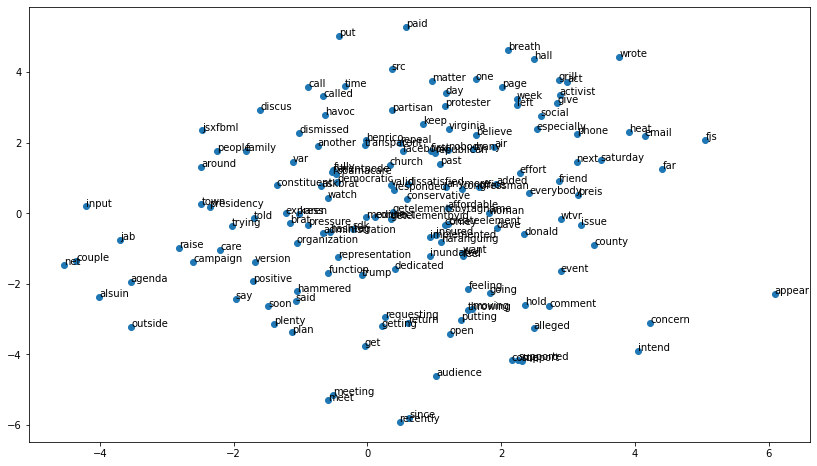

In [ ]:
# import modules
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 

# n_components - Dimension of the embedded space
distri = TSNE(n_components=2) 
# save the keywords of our dictionary to list
words = list(model_ft.wv.vocab.keys()) 
# call and save vector for each keyword
vectors = [model_ft.wv[word] for word in words] 

y = distri.fit_transform(vectors[:]) 

# create plot
plt.figure(figsize=(14,8)) 
plt.scatter(y[:150, 0],y[:150,1]) 

for label,x,y in zip(words,y[:150, 0],y[:150,1]): 
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points') 

# print plot  
plt.show()

In [4]:
from gensim.models.fasttext import FastText
import gensim
model_ft = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Datasets/wiki-news-300d-1M.vec")

In [ ]:
from gensim.models import KeyedVectors

# load the google word2vec model 
filename = '/content/drive/MyDrive/Datasets/GoogleNews-vectors-negative300.bin' 
model_w2v = KeyedVectors.load_word2vec_format(filename, binary=True) 



In [ ]:
# W2V
model_w2v.most_similar('holiday')

[('holidays', 0.8605460524559021),
 ('Christmas', 0.7785158157348633),
 ('festive', 0.7215063571929932),
 ('Thanksgiving', 0.7115361094474792),
 ('Holiday', 0.6561896800994873),
 ('Yuletide', 0.632927417755127),
 ('Easter', 0.6257205009460449),
 ('Xmas', 0.6234676837921143),
 ('yuletide', 0.623460054397583),
 ('Chirstmas', 0.6218713521957397)]

In [5]:
# FT
model_ft.wv.most_similar('holiday')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('holidays', 0.8656033277511597),
 ('vacation', 0.7612417340278625),
 ('busman', 0.7376842498779297),
 ('Christmas', 0.7326762676239014),
 ('Holidays', 0.6807483434677124),
 ('festive', 0.6581401824951172),
 ('Holiday', 0.6579716205596924),
 ('Thanksgiving', 0.6513049006462097),
 ('vacations', 0.641696035861969),
 ('celebrations', 0.6317011117935181)]

In [ ]:
# GLoVe
similar_word(emmbed_dict['holiday'])

['christmas',
 'holidays',
 'thanksgiving',
 'easter',
 'vacation',
 'festive',
 'weekend',
 'day',
 'eve',
 'celebration']

Calculate the result of: model.most_similar(positive=['king', 'queen'], negative=[‘man’]).

In [6]:
# FT
model_ft.wv.most_similar(positive=['king', 'queen'], negative=['man'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('queens', 0.6644245982170105),
 ('kings', 0.6039228439331055),
 ('monarch', 0.5995023846626282),
 ('uncrowned', 0.5870530605316162),
 ('Queen', 0.5809332728385925),
 ('royal', 0.5643048286437988),
 ('princess', 0.5410507321357727),
 ('King', 0.5334246754646301),
 ('monarchs', 0.5245094299316406),
 ('queen.', 0.5200331211090088)]

In [ ]:
model_w2v.most_similar(positive=['king', 'queen'], negative=['man'])
#W2V

[('queens', 0.595018744468689),
 ('monarch', 0.5815044641494751),
 ('kings', 0.5612993240356445),
 ('royal', 0.5204525589942932),
 ('princess', 0.5191516876220703),
 ('princes', 0.5086391568183899),
 ('NYC_anglophiles_aflutter', 0.5057314038276672),
 ('Queen_Consort', 0.49256715178489685),
 ('Queen', 0.48225677013397217),
 ('royals', 0.4781743586063385)]

In [ ]:
# GLoVe
vector_sum = emmbed_dict['king'] + emmbed_dict['queen'] - emmbed_dict['man']
similar_word(vector_sum)

['king',
 'monarch',
 'throne',
 'coronation',
 'prince',
 'consort',
 'vi',
 'princess',
 'vajiravudh',
 'royal']

**1 What is negative sampling?**


Negative sampling is a way to create negative examples for training a vector model.During training pairs of words are shown that are not neighbors in context.

**2 How does Subword model for FastText algorithms is implemented?**

A subword model is a representation of a word through chains of characters (n-grams) with n from 3 to 6 characters from the beginning to the end of the word, plus the entire word itself. For example, the word lock with n = 3 will be represented by 3-grams <re, rea, ead, adi, din, ing, ng> and the sequence <reading>. This approach allows you to work with those words that the model has not seen before.

**3 How input vector to the network is calculated?**

Each word is decomposed into its character n-grams N and each n-gram n is represented by a vector xn. The word vector is then simply the sum of both representations, i.e.:


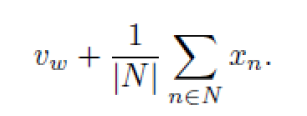

**4 Why do we need to use hash function?**

The features obtained by splitting into n-grams have a huge dimension (i.e. a huge heavy table
is obtained for the text). This can slow down the performance of a model trained on these features.
To fix the dimensions of features, feature hashing is used (a special procedure that allows you to
encode objects of different sizes using character strings of the same length). The Fowler-Noll-Vo
[http://www.isthe.com/chongo/tech/comp/fnv/] hashing function that maps n-grams to integers in
1 to K, K = 2×106 is used. Features get hash indexes, which helps to read them faster. Ultimately,
a word is represented by its index in the word dictionary and the set of hashed n-grams it contains.
Although this hashing approach results in collisions, it helps control the vocabulary size to a great
extent.

**5 What for is Huffman coding algorithm used during text classification?**

When the FastText word representation is used for text classification and analysis, the greater
the number of classes, the longer the running time of the linear model. To optimize the classifier,
a hierarchical softmax based on the Huffman coding algorithm is used